<a href="https://colab.research.google.com/github/banno-0720/learning_PyTorch/blob/main/hugging_face_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Overview

Welcome to the Learn Hugging Face Text Classificaiton project!

We’ll start with a text dataset, build a model to classify text samples and then share our model as a demo others can use.

To do so, we’ll be using a handful of helpful open-source tools from the Hugging Face ecosystem.
<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/00-project-food-not-food-overview.png"
     alt="
Project overview image for 'Food Not Food' classification at Nutrify, a food app. The project involves building and deploying a binary text classification model to identify food-related text using Hugging Face Datasets, Transformers, and deploying with Hugging Face Hub/Spaces and Gradio. Examples include labels for 'A photo of sushi rolls on a white plate' (food), 'A serving of chicken curry in a blue bowl' (food), and 'A yellow tractor driving over a grassy hill' (not food). The process is visually depicted from data collection to model training and demo deployment."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>We're going to put on our internship hats and build a food not food text classification model using tools from the Hugging Face ecosystem.</figcaption>
</figure>



## 1.1 What we're going to build

We're going to be bulding a `food`/`not_food` **text classification model**.

Given a piece of a text (such as an image caption), our model will be able to predict if it's about food or not.

More specifically, we're going to follow the following steps:

1. **[Data](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions): Problem defintion and dataset preparation** - Getting a dataset/setting up the problem space.
2. **[Model](https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased): Finding, training and evaluating a model** - Finding a text classification model suitable for our problem on Hugging Face and customizing it to our own dataset.
3. **[Demo](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo): Creating a demo and put our model into the real world** - Sharing our trained model in a way others can access and use.

By the end of this project, you'll have a trained model and [demo on Hugging Face](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo) you can share with others:

In [1]:
from IPython.display import HTML

HTML("""
<iframe
	src="https://mrdbourke-learn-hf-food-not-food-text-classifier-demo.hf.space"
	frameborder="0"
	width="850"
	height="650"
></iframe>
""")

## 1.2 What is text classification?

Text classification is the process of assigning a category to a piece of text.

Where a category can be almost anything and a piece of text can be a word, phrase, sentence, paragraph or entire document.

Example text classification problems include:

| **Problem** | **Description** | **Problem Type** |
|-----|-----|-----|
| Spam/phishing email detection | Is an email spam or not spam? Or is it a phishing email or not? | Binary classification (one thing or another) |
| Sentiment analysis | Is a piece of text positive, negative or neutral? Such as classifying product reviews into good/bad/neutral. | Multi-class classification (one thing from many) |
| Language detection | What language is a piece of text written in? | Multi-class classification (one thing from many) |
| Topic classification | What topic(s) does a news article belong to? | Multi-label classification (one or more things from many) |
| Hate speech detection | Is a comment hateful or not hateful? | Binary classification (one thing or another) |
| Product categorization | What categories does a product belong to? | Multi-label classification (one or more things from many) |
| Business email classification | Which category should this email go to? | Multi-class classification (one thing from many) |

Text classification is a very common problem in many business settings.

For example, a project I've worked on previously as a machine learning engineer was building a text classification model to classify different insurance claims into `claimant_at_fault`/`claimant_not_at_fault` for a large insurance company.

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/02-example-text-classification-workflow.png"
     alt="Diagram showing an example text classification workflow for insurance claims. It includes customer-submitted text such as 'Someone crashed into my car' and 'I accidentally crashed into someone's letterbox'. These texts are processed through an insurance app by Lime Insurance Co. and input into a model that determines fault based on the text. The classification outputs are 'Not at Fault' and 'At Fault', allowing claims to be forwarded to the appropriate department. The workflow is broken down into steps: Insurance claims, Insurance app, Model, and Classification outputs."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>An example text classification problem I once worked on to classify insurance claim texts into at fault or not fault. This result of the model would send the claim to a different department in the insurance company.</figcaption>
</figure>

Speaking of models, there are several different kinds of models you can use for text classification.

And each will have its pros and cons depending on the problem you're working on.

Example text classification models include:

| **Model** | **Description** | **Pros** | **Cons** |
|-----|-----|-----|-----|
| Rule-based | Uses a set of rules to classify text (e.g. if text contains "sad" -> sentiment = low) | Simple, easy to understand | Requires manual creation of rules |
| [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) | Counts the frequency of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) | Weighs the importance of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| Deep learning-based models | Uses neural networks to learn patterns in text | Can learn complex patterns at scale | Can require large amounts of data/compute power to run, not as easy to understand (can be hard to debug) |

For our project, we're going to go with a deep learning model.

Why?

Because Hugging Face helps us do so.

And in most cases, with a quality dataset, a deep learning model will often perform better than a rule-based or other model.

## 1.3 Why train your own text classification models?

You can customize **pre-trained models** for text classification as well as API-powered models and LLMs such as GPT, Gemini, Claude or Mistral.

Depending on your requirements, there are several pros and cons for using your own model versus using an API.

Training/fine-tuning your own model:

| Pros | Cons |
| :----- | :----- |
| **Control:** Full control over model lifecycle. | Can be complex to get setup. |
| No usage limits (aside from compute constraints). | Requires dedicated compute resources for training/inference. |
| Can train once and deploy everywhere/whenever you want (for example, Tesla deploying a model to all self-driving cars). | Requires maintenance over time to ensure performance remains up to par. |
| **Privacy:** Data can be kept in-house/app and doesn’t need to go to a third party. | Can require longer development cycles compared to using existing APIs. |
| **Speed:** Customizing a small model for a specific use case often means it runs much faster. | |

Using a pre-built model API (e.g. GPT, Gemini, Claude, Mistral):

| Pros | Cons |
| :----- | :----- |
| **Ease of use:** often can be setup within a few lines of code. | If the model API goes down, your service goes down. |
| No maintenance of compute resources. | Data is required to be sent to a third-party for processing. |
| Access to the most advanced models. | The API may have usage limits per day/time period. |
| Can scale if usage increases. | Can be much slower than using dedicated models due to requiring an API call. |

For this project, we're going to focus on fine-tuning our own model.

## 1.4 Workflow we're going to follow

Our motto is *data, model, demo!*

So we're going to follow the rough workflow of:

1. Create and preprocess data.
2. Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

I say rough because machine learning projects are often non-linear in nature.

As in, because machine learning projects involve many experiments, they can kind of be all over the place.

But this worfklow will give us some good guidelines to follow.

<figure style="text-align: center; display: inline-block;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/01-hugging-face-workflow.png"
     alt="The diagram shows the Hugging Face model development workflow, which includes the following steps: start with an idea or problem, get data ready (turn into tensors/create data splits), pick a pretrained model (to suit your problem), train/fine-tune the model on your custom data, evaluate the model, improve through experimentation, save and upload the fine-tuned model to the Hugging Face Hub, and turn your model into a shareable demo. Tools used in this workflow are Datasets/Tokenizers, Transformers/PEFT/Accelerate/timm, Hub/Spaces/Gradio, and Evaluate."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption style="width: 100%; box-sizing: border-box;">A general Hugging Face workflow from idea to shared model and demo using tools from the Hugging Face ecosystem. You'll notice some of the steps don't match with our workflow outline above. This is because the text-based workflow outline above breaks some of the steps down for educational purposes. These kind of workflows are not set in stone and are more of guide than specific directions. See information on each of the tools in the <a href="https://huggingface.co">Hugging Face documentation</a>.</figcaption>
</figure>

# 2. Importing Necessary Libraries


In [2]:
try:
  import datasets, evaluate, accelerate
  import gradio as gr
except ModuleNotFoundError:
  !pip install -U datasets evaluate accelerate gradio
  import datasets, evaluate, accelerate
  import gradio as gr

import random

import numpy as np
import pandas as pd

import torch
import transformers

print("Using transformers version: {transformers.__version__}")
print("Using datasets version: {datasets.__version__}")
print("Using torch version: {}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# 3. Getting a dataset

Getting a dataset is one of the most important things a machine learning project.

The dataset you often determines the type of model you use as well as the quality of the outputs of that model.

Meaning, if you have a high quality dataset, chances are, your future model could also have high quality outputs.

It also means if your dataset is of poor quality, your model will likely also have poor quality outputs.

For a text classificaiton problem, your dataset will likely come in the form of text (e.g. a paragraph, sentence or phrase) and a label (e.g. what category the text belongs to).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/learn-hf-food-not-food-text-classification-dataset.png"
     alt="A screenshot of a webpage from Hugging Face's datasets section, specifically showing the 'learn_hf_food_not_food_image_captions' dataset by user mrdourke. The page displays a dataset card with a dataset viewer for a text classification task. The viewer shows examples of captions with their corresponding labels, distinguishing between 'food' and 'not_food.' The screenshot includes interface elements like navigation menus, a search bar, and options to use or edit the dataset."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Our <a href="https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions"> food not food image caption dataset</a> on the Hugging Face Hub.</figcaption>
</figure>

In our case, our dataset comes in the form of a collection of synthetic image captions and their corresponding labels (food or not food).

You can find it on Hugging Face under the name [`mrdbourke/learn_hf_food_not_food_image_captions`](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

A Large Language Model (LLM) was asked to generate various image caption texts about food and not food.

Getting another model to create data for a problem is known as **synthetic data generation** and is a very good way of bootstrapping towards creating a model.

One workflow would be to use real data wherever possible and use synthetic data to boost when needed.

Note that it's always advised to evaluate/test models on real-life data as opposed to synthetic data.

## 3.1 Where can you get more datasets?

The are many different places you can get datasets for text-based problems.

One of the best places is on the Hugging Face Hub, specifically [huggingface.co/datasets](https://huggingface.co/datasets).

Here you can find many different kinds of problem specific data such as [text classification](https://huggingface.co/datasets?task_categories=task_categories:text-classification&sort=trending).

There are also many more datasets available on [Kaggle Datasets](https://www.kaggle.com/datasets).

And thanks to the power of LLMs (Large Language Models), you can also now create your own text classifications by generating samples (this is how I created the dataset for this project).

<figure style="text-align: center;">
    <!-- figtemplate -->
    <img src="https://huggingface.co/datasets/mrdbourke/learn-hf-images/resolve/main/learn-hf-text-classification/03-places-to-get-text-datasets.png"
     alt="
Side-by-side comparison of text classification datasets available on Hugging Face and Kaggle. The Hugging Face interface shows a variety of datasets categorized under 'Text Classification', while the Kaggle interface displays a search for text classification datasets, listing several options. Both platforms provide extensive datasets for machine learning and natural language processing projects. The image emphasizes that Hugging Face and Kaggle are valuable resources for obtaining datasets, depicted with respective platform screenshots and highlighted sections for text classification."
     style="width: 100%; max-width: 900px; height: auto;"/>
     <figcaption>Hugging Face Datasets and Kaggle Datasets are two of the best places on the internet to find all kinds of different datasets. If you can't find an existing dataset related to your problem you can either use your own data or potentially generate synthetic data samples with an LLM. For more on synthetic data generation, see the <a href="https://developer.nvidia.com/blog/creating-synthetic-data-using-llama-3-1-405b">Creating Synthetic Data</a> article by NVIDIA.</figcaption>
</figure>

## 3.2 Loading the dataset

In [3]:
# Load the dataset from Hugging Face Hub
dataset = datasets.load_dataset("mrdbourke/learn_hf_food_not_food_image_captions")

# Inspect the dataset
dataset

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 250
    })
})

In [4]:
# What features are there?
dataset.column_names

{'train': ['text', 'label']}

In [5]:
# Access the training split
dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 250
})

In [6]:
dataset["train"][0]

{'text': 'Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
 'label': 'food'}

## 3.3 Inspect random examples from the dataset


In [7]:
import random

random_indexs = random.sample(range(len(dataset["train"])), 5)
random_samples = dataset["train"][random_indexs]

print(f"[INFO] Radnom samples from dataset:\n")
for item in zip(random_samples["text"], random_samples["label"]):
  print(f"Text: {item[0]} | Label: {item[1]}")

[INFO] Radnom samples from dataset:

Text: Spicy eggplant curry with fresh basil, featuring tender eggplant in a rich sauce with onions and tomatoes, finished with basil leaves. | Label: food
Text: Pizza with a Mediterranean twist, featuring toppings like feta cheese, kalamata olives, and roasted red peppers | Label: food
Text: Friends having a barbecue in the backyard while pets play nearbyA collection of cleaning products under the sink | Label: not_food
Text: Rutabaga in a bowl, sprinkled with nutmeg and served with a side of brown sugar for a sweet, comforting dish. | Label: food
Text: Set of pillows arranged on a couch | Label: not_food


In [8]:
# Get unique label values
dataset["train"].unique("label")

['food', 'not_food']

In [9]:
# Check number of each label
from collections import Counter

Counter(dataset["train"]["label"])

Counter({'food': 125, 'not_food': 125})

In [10]:
# Turn our dataset into a DataFrame and get a random sample
food_not_food_df = pd.DataFrame(dataset["train"])
food_not_food_df.sample(7)

,text,label
79,"Creamy spinach and potato curry, featuring flu...",food
24,Set of headphones placed on a desk,not_food
69,A slice of veggie pizza loaded with colorful a...,food
74,Set of paintbrushes stored in a jar,not_food
30,Set of test tubes arranged in a rack,not_food
227,A plate of sliced pineapple with a side of whi...,food
117,"Spicy eggplant curry with fresh basil, featuri...",food


In [11]:
# Get the value counts of the label column
food_not_food_df["label"].value_counts()

,count
label,
food,125
not_food,125


# 4. Preparing data for text classification

## 4.1 Creating a mapping from labels to numbers


In [12]:
# Create mapping from id2label and label2id
id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

print(f"Label to ID mapping: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to ID mapping: {'not_food': 0, 'food': 1}
ID to Label mapping: {0: 'not_food', 1: 'food'}


Rather than hard-coding our label to ID maps, we can also create them programmatically from the dataset (this is helpful if you have many classes).

In [13]:
id2label = {idx: label for idx, label in enumerate(dataset["train"].unique("label")[::-1])} # reverse sort list to have "not_food" first
label2id = {label: idx for idx, label in id2label.items()}

print(f"Label to Id mappimg: {label2id}")
print(f"ID to Label mapping: {id2label}")

Label to Id mappimg: {'not_food': 0, 'food': 1}
ID to Label mapping: {0: 'not_food', 1: 'food'}


In [14]:
# Turn labels into 0 or 1 (e.g. 0 for "not_food", 1 for "food")
def map_labels_to_number(example):
  example["label"] = label2id[example["label"]]
  return example

example_sample = {"text": "This is a sentence about my favourite food: honey.", "label": "food"}

# Test the function
map_labels_to_number(example_sample)

{'text': 'This is a sentence about my favourite food: honey.', 'label': 1}

In [15]:
# Map our dataset labels to numbers
dataset = dataset["train"].map(map_labels_to_number)
dataset[:5]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

{'text': ['Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
  'Set of books stacked on a desk',
  'Watching TV together, a family has their dog stretched out on the floor',
  'Wooden dresser with a mirror reflecting the room',
  'Lawn mower stored in a shed'],
 'label': [1, 0, 0, 0, 0]}

In [16]:
# Shuffle the dataset and view the first 5 samples (will return different results each time)
dataset.shuffle()[:5]

{'text': ['Cooking dinner in the kitchen, a man has a dog eagerly watching',
  'Set of binoculars placed on a table',
  'Silverware organizer keeping cutlery tidy in a kitchen drawer',
  'Set of curtains draped over a window',
  'A white car parked in a driveway with a wooden fence behind it'],
 'label': [0, 0, 0, 0, 0]}

## 4.2 Split the dataset into training and test sets


In [17]:
# Create train/test splits
dataset = dataset.train_test_split(test_size=0.2, seed=42) # note: seed isn't needed, just here for reproducibility, without it you will get different splits each time you run the cell
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})

In [18]:
random_idx_train = random.randint(0, len(dataset["train"]))
random_sample_train = dataset["train"][random_idx_train]

random_idx_test = random.randint(0, len(dataset["test"]))
random_sample_test = dataset["test"][random_idx_test]

print(f"[INFO] Random sample from training dataset:")
print(f"Text: {random_sample_train['text']}\nLabel: {random_sample_train['label']} ({id2label[random_sample_train['label']]})\n")
print(f"[INFO] Random sample from testing dataset:")
print(f"Text: {random_sample_test['text']}\nLabel: {random_sample_test['label']} ({id2label[random_sample_test['label']]})")

[INFO] Random sample from training dataset:
Text: Garden hose rolled up and ready in a yard
Label: 0 (not_food)

[INFO] Random sample from testing dataset:
Text: A bowl of sliced kiwi with a sprinkle of sugar and a side of yogurt
Label: 1 (food)


## 4.3 Tokenizing text data


In [19]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
                                          use_fast=True) # uses fast tokenization (backend by tokenizers library and implemented in RUst) by default, if not available will default to Python implemention

tokenizer

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [20]:
# Test out tokenizer
tokenizer("I love pizza")

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [21]:
# Try addind a "!" at the end
tokenizer("I love pizza!")

{'input_ids': [101, 1045, 2293, 10733, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [22]:
# Get the length of the vocabulary
length_of_tokenizer_vocab = len(tokenizer.vocab)
print(f"Length of the tokenizer vocabulary: {length_of_tokenizer_vocab}")

# Get the maximum sequence length the tokenizer can handle
max_tokenizer_input_sequence_length = tokenizer.model_max_length
print(f"Max tokenizer input sequence length: {max_tokenizer_input_sequence_length}")

Length of the tokenizer vocabulary: 30522
Max tokenizer input sequence length: 512


In [23]:
tokenizer.vocab["pizza"]

10733

In [24]:
# Does "himanshu" occur in the vocab?
# tokenzizer.vocab["himanshu"] # This throws KeyError

# This doesn't work because it doesnt exist in vocab

We dont need to worry, this is okay, since when calling the tokenizer on the word, it will automatically split into word pieces or subwords.

In [25]:
tokenizer("himanshu")

{'input_ids': [101, 2032, 6962, 6979, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [26]:
tokenizer.convert_ids_to_tokens(tokenizer("himanshu").input_ids)

['[CLS]', 'him', '##ans', '##hu', '[SEP]']

In [27]:
# Try to tokenize an emoji
tokenizer.convert_ids_to_tokens(tokenizer("🍕").input_ids)

['[CLS]', '[UNK]', '[SEP]']

In [28]:
# Get the first 5 items in the tokenizer vocab
sorted(tokenizer.vocab.items())[:5]

[('!', 999), ('"', 1000), ('#', 1001), ('##!', 29612), ('##"', 29613)]

In [29]:
import random

random.sample(sorted(tokenizer.vocab.items()), k=5)

[('traveled', 6158),
 ('that', 2008),
 ('why', 2339),
 ('rite', 14034),
 ('tau', 19982)]

## 4.4 Making a preprocessing function to tokenize text


In [30]:
def tokenize_text(examples):
  """
  Tokenize given example text and return the tokenized text.
  """
  return tokenizer(examples["text"],
                   padding=True, # pad short sequences to longest sequence in the batch
                   truncation=True) # Truncate long sequences to the maximum length the model can handle

In [31]:
example_sample_2 = {"text": "I love pizza", "label": 1}

# Test the function
tokenize_text(example_sample_2)

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [32]:
# Map our tokenize_text function to the dataset
tokenized_dataset = dataset.map(function=tokenize_text,
                                batched=True, # set batched=True to operate across batches of examples rather than only single examples
                                batch_size=1000) # defaults to 1000, can be increased if you have a large dataset

tokenized_dataset

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})

In [33]:
# Get two samples from the tokenized dataset
train_tokenized_sample = tokenized_dataset["train"][0]
test_tokenized_sample = tokenized_dataset["test"][0]

for key in train_tokenized_sample.keys():
    print(f"[INFO] Key: {key}")
    print(f"Train sample: {train_tokenized_sample[key]}")
    print(f"Test sample: {test_tokenized_sample[key]}")
    print("")

[INFO] Key: text
Train sample: Set of headphones placed on a desk
Test sample: A slice of pepperoni pizza with a layer of melted cheese

[INFO] Key: label
Train sample: 0
Test sample: 1

[INFO] Key: input_ids
Train sample: [101, 2275, 1997, 2132, 19093, 2872, 2006, 1037, 4624, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [101, 1037, 14704, 1997, 11565, 10698, 10733, 2007, 1037, 6741, 1997, 12501, 8808, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[INFO] Key: attention_mask
Train sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



## 4.5 Tokenization takeaways

We've now seen and used tokenizers in practice.

A few takeaways before we start to build a model:

* Tokenizers are used to turn text (or other forms of data such as images and audio) into a numerical representation ready to be used with a machine learning model.
* Many models reuse existing tokenizers and many models have their own specific tokenizer paired with them. Hugging Face's `transformers.AutoTokenizer`, `transformers.AutoProcessor` and `transformers.AutoModel` classes make it easy to pair tokenizers and models based on their name (e.g. `distilbert/distilbert-base-uncased`).

# 5. Setting up an evaluation metric


In [34]:
import evaluate
import numpy as np
from typing import Tuple

accuracy_metric = evaluate.load("accuracy")

def compute_accuracy(predictions_and_labels: Tuple[np.array, np.array]):
  """
  Computes the accuracy of a model by comparing yje predictions and labels.
  """
  predictions, labels = predictions_and_labels

  # Get highest prediction probability of each prediction if predictions are probabilities
  if len(predictions.shape) >= 2:
    predictions = np.argmax(predictions, axis=1)

  return accuracy_metric.compute(predictions=predictions, references=labels)

In [35]:
# Create example list of predictions and labels
example_predictions_all_correct = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
example_predictions_one_wrong = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
example_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Test the function
print(f"Accuracy when all predictions are correct: {compute_accuracy((example_predictions_all_correct, example_labels))}")
print(f"Accuracy when one prediction is wrong: {compute_accuracy((example_predictions_one_wrong, example_labels))}")

Accuracy when all predictions are correct: {'accuracy': 1.0}
Accuracy when one prediction is wrong: {'accuracy': 0.9}


# 6. Setting up a model for training

We've gone through the important steps of setting data up for training (and evaluation).

Now let's prepare a model.

We'll keep going through the following steps:

1. ✅ Create and preprocess data.
2. Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predictions on the test data.
8. Turn the model into a shareable demo.

Let's start by creating an instance of a model.

Since we're working on text classification, we'll do so with `transformers.AutoModelForSequenceClassification` (where sequence classification means a sequence of something, e.g. our sequences of text).

We can use the `from_pretrained()` method to instatiate a pretrained model from the Hugging Face Hub.


In [36]:
# Get id and label mappings
print(f"id2label: {id2label}")
print(f"label2id: {label2id}")

id2label: {0: 'not_food', 1: 'food'}
label2id: {'not_food': 0, 'food': 1}


In [37]:
from transformers import AutoModelForSequenceClassification

# Setup model for fine-tuning with classification head (top layers of network)
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
    num_labels=2, # can customize this to the number of classes in your dataset
    id2label=id2label, # mappings from class IDs to the class labels (for classification tasks)
    label2id=label2id
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# try and make a prediction with the loaded model (this will error)
# model(**tokenized_dataset["train"][0])

In [39]:
# Inspect the model
# model

## 6.1 Counting the parameters of our model



In [40]:
def count_params(model):
  """
  Count the parameters of a PyTorch model
  """
  trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
  total_parameters = sum(p.numel() for p in model.parameters())

  return {"trainable_parameters": trainable_parameters, "total_parameters": total_parameters}

# Count the parameters of the model
count_params(model)

{'trainable_parameters': 66955010, 'total_parameters': 66955010}

## 6.2 Create a directory for saving models


In [41]:
# Create model output directory
from pathlib import Path

# Create models directory
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Create model save name
model_save_name = "learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create model save path
model_save_dir = Path(models_dir, model_save_name)

model_save_dir

PosixPath('models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased')

## 6.3 Setting up training arguments with TrainingArguments


In [42]:
from transformers import TrainingArguments

print(f"[INFO] Saving model checkpoints to: {model_save_dir}")

# Create training arguments
training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=3,
    use_cpu=False,
    seed=42,
    load_best_model_at_end=True,
    logging_strategy="epoch",
    report_to="none",
    # push_to_hub=True
    # hub_token="Your token here"
    hub_private_repo=False
)

# Print out training_args to inspect (warning, it is quite a long output)
# training_args

[INFO] Saving model checkpoints to: models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased


## 6.4 Setting up an instance of Trainer


In [43]:
from transformers import Trainer

# Setup Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    # Note: the 'tokenizer' parameter will be changed to 'processing_class' in Transformers v5.0.0
    tokenizer=tokenizer, # Pass tokenizer to the Trainer for dynamic padding (padding as the training happens) (see "data_collator" in the Trainer docs)
    compute_metrics=compute_accuracy
)

<ipython-input-43-a2fafd012213>:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## 6.5 Training our text classification model

In [44]:
# Train a text classification model
results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.445300,0.105647,1.000000
2,0.053700,0.009589,1.000000
3,0.006700,0.002733,1.000000
4,0.002400,0.001464,1.000000
5,0.001400,0.001074,1.000000
6,0.001000,0.000891,1.000000
7,0.000900,0.000782,1.000000
8,0.000700,0.000716,1.000000
9,0.000700,0.000682,1.000000
10,0.000700,0.000670,1.000000


In [45]:
# Inspect training metrics
for key, value in results.metrics.items():
  print(f"[INFO] {key}: {value}")

[INFO] train_runtime: 80.5119
[INFO] train_samples_per_second: 24.841
[INFO] train_steps_per_second: 0.869
[INFO] total_flos: 18110777160000.0
[INFO] train_loss: 0.05135354741609522
[INFO] epoch: 10.0


## 6.6 Save the model for later use

In [46]:
# Save model
print(f"[INFO] Saving model to {model_save_dir}")
trainer.save_model(output_dir=model_save_dir)

[INFO] Saving model to models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased


## 6.7 Inspecting the model training metrics

In [47]:
# Get training history
trainer_history_all = trainer.state.log_history
trainer_history_metrics = trainer_history_all[:-1] # get everything except the training time metrics (we've seen these already)
trainer_history_training_time = trainer_history_all[-1] # this is the same value as results.metrics from above

# View the first 4 metrics from the training history
# trainer_history_metrics[:4]

In [48]:
import pprint # import pretty print for nice printing of lists

# Extract training and evaluation metrics
trainer_history_training_set = []
trainer_history_eval_set =[]

# Loop through metrics and filter for training and eval metrics
for item in trainer_history_metrics:
  item_keys = list(item.keys())
  # Check to see if "eval" is in the keys of the item
  if any("eval" in item for item in item_keys):
    trainer_history_eval_set.append(item)
  else:
    trainer_history_training_set.append(item)

# Show the first two items in each metric set
print(f"[INFO] First two items in training set:")
pprint.pprint(trainer_history_training_set[:2])

print(f"\n[INFO] First two items in evaluation set:")
pprint.pprint(trainer_history_eval_set[:2])

[INFO] First two items in training set:
[{'epoch': 1.0,
  'grad_norm': 2.7888379096984863,
  'learning_rate': 9e-05,
  'loss': 0.4453,
  'step': 7},
 {'epoch': 2.0,
  'grad_norm': 0.20702315866947174,
  'learning_rate': 8e-05,
  'loss': 0.0537,
  'step': 14}]

[INFO] First two items in evaluation set:
[{'epoch': 1.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.10564697533845901,
  'eval_runtime': 0.0521,
  'eval_samples_per_second': 959.325,
  'eval_steps_per_second': 38.373,
  'step': 7},
 {'epoch': 2.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.009588977321982384,
  'eval_runtime': 0.0557,
  'eval_samples_per_second': 897.484,
  'eval_steps_per_second': 35.899,
  'step': 14}]


In [49]:
# Create pandas DataFrames for the training and evaluation metrics
trainer_history_training_df = pd.DataFrame(trainer_history_training_set)
trainer_history_eval_df = pd.DataFrame(trainer_history_eval_set)

trainer_history_training_df.head()

,loss,grad_norm,learning_rate,epoch,step
0,0.4453,2.788838,0.00009,1.0,7
1,0.0537,0.207023,0.00008,2.0,14
2,0.0067,0.057355,0.00007,3.0,21
3,0.0024,0.029847,0.00006,4.0,28
4,0.0014,0.027649,0.00005,5.0,35


In [50]:
trainer_history_eval_df.head()

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step
0,0.105647,1.0,0.0521,959.325,38.373,1.0,7
1,0.009589,1.0,0.0557,897.484,35.899,2.0,14
2,0.002733,1.0,0.0557,897.527,35.901,3.0,21
3,0.001464,1.0,0.0537,931.012,37.240,4.0,28
4,0.001074,1.0,0.0528,946.676,37.867,5.0,35


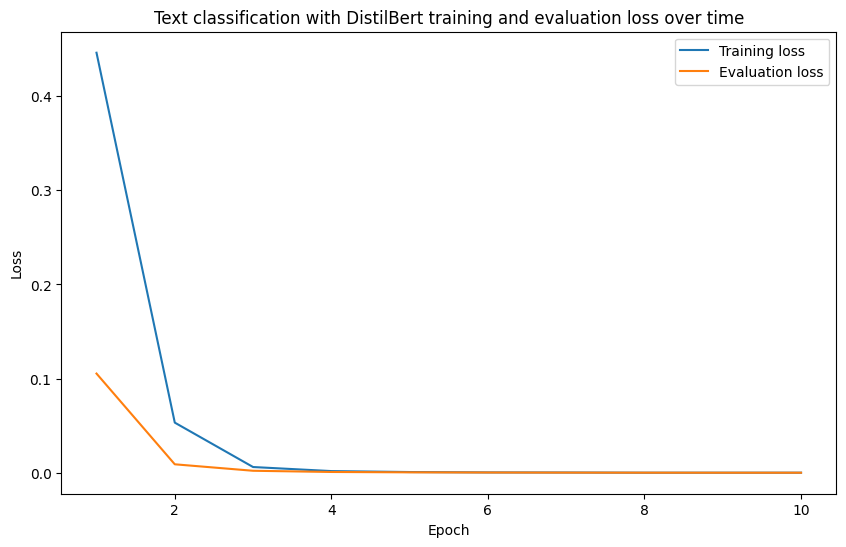

In [51]:
# Plot training and evaluation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(trainer_history_training_df["epoch"], trainer_history_training_df["loss"], label="Training loss")
plt.plot(trainer_history_eval_df["epoch"], trainer_history_eval_df["eval_loss"], label="Evaluation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Text classification with DistilBert training and evaluation loss over time")
plt.legend()
plt.show()

## 6.8 Pushing our model to the Hugging Face Hub

In [52]:
# Save our model to the Hugging Face Hub
# This will be public, since we set hub_private_repo=False in our TrainingArguments
model_upload_url = trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model",
    # token="YOUR_HF_TOKEN_HERE" # This will default to the token you have saved in your Hugging Face config
)
print(f"[INFO] Model successfully uploaded to Hugging Face Hub with at URL: {model_upload_url}")

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/5.43k [00:00<?, ?B/s]

[INFO] Model successfully uploaded to Hugging Face Hub with at URL: https://huggingface.co/HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased/tree/main/


# 7. Making and evaluating predictions on the test data

Model trained, let's now evaluate it on the test data.

Or step 7 in our workflow:

1. ✅ Create and preprocess data.
2. ✅ Define the model we'd like use with [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/en/model_doc/auto#transformers.AutoModelForSequenceClassification) (or another similar model class).
3. ✅ Define training arguments (these are hyperparameters for our model) with [`transformers.TrainingArguments`](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments).
4. ✅ Pass `TrainingArguments` from 3 and target datasets to an instance of [`transformers.Trainer`](https://huggingface.co/docs/transformers/en/main_classes/trainer).
5. ✅ Train the model by calling [`Trainer.train()`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.train).
6. ✅ Save the model (to our local machine or to the Hugging Face Hub).
7. Evaluate the trained model by making and inspecting predctions on the test data.
8. Turn the model into a shareable demo.

A reminder that the test data is data that our model has never seen before.

So it will be a good estimate of how our model will do in a production setting.

We can make predictions on the test dataset using [`transformers.Trainer.predict`](https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.Trainer.predict).

And then we can get the prediction values with the `predictions` attribute and assosciated metrics with the `metrics` attribute.

In [53]:
# Perform predictions on the test set
predictions_all = trainer.predict(tokenized_dataset["test"])
prediction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print(f"[INFO] Prediction metrics on the test data:")
prediction_metrics

[INFO] Prediction metrics on the test data:


{'test_loss': 0.0006697939825244248,
 'test_accuracy': 1.0,
 'test_runtime': 0.0876,
 'test_samples_per_second': 570.739,
 'test_steps_per_second': 22.83}

Looks like our model did an outstanding job!

And it was *very* quick too.

This is one of the benefits of using a smaller pretrained model and customizing it to your own dataset.

You can achieve outstanding results in a very quick time as well as have a model capable of performing thousands of predictions per second.

We can also calculate the accuracy by hand by comparing the prediction labels to the test labels.

To do so, we'll:

1. Calculate the prediction probabilities (though this is optional as we could skip straight to 2 and get the same results) by passing the `prediction_values` to [`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
2. Find the index of the prediction value with the highest value (the index will be equivalent to the predicted label) using [`torch.argmax`](https://pytorch.org/docs/stable/generated/torch.argmax.html) (we could also use [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) here) to find the predicted labels.
3. Get the true labels from the test dataset using `dataset["test"]["label"]`.
4. Compare the predicted labels from 2 to the true labels from 3 using [`sklearn.metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to find the accuracy.

In [54]:
import torch
from sklearn.metrics import accuracy_score

# 1. Get prediction probabilities (this is optional, could get the same results with step 2 onwards)
pred_probs = torch.softmax(torch.tensor(prediction_values), dim=1)

# 2. Get the predicted labels
pred_labels = torch.argmax(pred_probs, dim=1)

# 3. Get the true labels
true_labels = dataset["test"]["label"]

# 4. Compare predicted labels to true get the test accuracy
test_accuracy = accuracy_score(y_true=true_labels,
                               y_pred=pred_labels)

print(f"[INFO] Test accuracy: {test_accuracy*100}%")

[INFO] Test accuracy: 100.0%


In [55]:
# Make a DataFrame of test predictions
test_predictions_df = pd.DataFrame({
    "text": true_labels,
    "pred_label": pred_labels,
    "pred_prob": torch.max(pred_probs, dim=1).values
})

test_predictions_df.head()

,text,pred_label,pred_prob
0,1,1,0.999468
1,0,0,0.999453
2,1,1,0.999464
3,0,0,0.999472
4,0,0,0.999478


In [56]:
# Show 10 examples with low prediction probability
test_predictions_df.sort_values("pred_prob", ascending=True).head(10)

,text,pred_label,pred_prob
43,0,0,0.992882
17,0,0,0.999409
39,0,0,0.999429
40,1,1,0.999439
23,0,0,0.999448
38,0,0,0.999449
26,1,1,0.999450
11,1,1,0.999451
1,0,0,0.999453
42,1,1,0.999454


# 8. Making and inspecting predictions on custom text data

We've seen how our model performs on the test dataset (quite well).

But how might we check its performance on our own custom data?

For example, text-based image captions from the wild.

Well, we've got two ways to load our model now too:

1. Load model locally from our computer (e.g. via `models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).
2. Load model from Hugging Face Hub (e.g. via `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).

Either way of loading the model results in the same outcome: being able to make predictions on given data.

So how about we start by setting up our model paths for both local loading and loading from the Hugging Face Hub.

In [57]:
# Setup local model path
local_model_path = "models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Note: Be sure to change "HimanshuGoyal2004" to your Hugging Face username
huggingface_model_path = "HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

## 8.1 Discussing ways to make predictions (inference)

When we've loaded our trained model, because of the way we've set it up, there are two main ways to make predictions on custom data:

1. **Pipeline mode** using [`transformers.pipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#pipelines) and passing it our target model, this allows us to preprocess custom data and make predictions in one step.
2. **PyTorch mode** using a combination of [`transformers.AutoTokenizer`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoTokenizer) and [`transformers.AutoModelForSequenceClassification`](https://huggingface.co/docs/transformers/v4.42.0/en/model_doc/auto#transformers.AutoModelForSequenceClassification) and passing each our target model, this requires us to preprocess our data before passing to a model, however, it offers the most customization.

Each method supports:

1. Predictions one at a time (batch size of 1), for example, one person using the app at a time.
2. Batches of predictions at a time (predictions with a batch size of `n` where `n` can be any number, e.g. `8`, `16`, `32`), for example, many people using a service simultaneously such as a voice chat and needing to filter comments (predicting on batches of size `n` is usually much faster than batches of 1).

Whichever method we choose, we'll have to set the target device we'd like the operations to happen on.

In general, it's best to make predictions on the most powerful accelerator you have available.

And in most cases that will be a NVIDIA GPU > Mac GPU > CPU.

So let's write a small function to pick the target device for us in that order.

**Note:-** Making predictions is also referred to as **inference**.

Because the model is going to *infer* on some data what the output should be.

Inference is often faster than training on a per sample basis as no model weights are updated (less computation).

However, inference can use more compute than training over the long run because you could train a model once over a few hours (or days or longer) and then use it for inference for several months (or longer), millions of times (or more).

In [58]:
def set_device():
    """
    Set device to CUDA if available, else MPS (Mac), else CPU.

    This defaults to using the best available device (usually).
    """
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device

DEVICE = set_device()
print(f"[INFO] Using device: {DEVICE}")

[INFO] Using device: cuda


## 8.2 Making predictions with pipeline

The [`transformers.pipeline`](https://huggingface.co/docs/transformers/v4.42.0/en/main_classes/pipelines#transformers.pipeline) method creates a machine learning pipeline.

Data goes in one end and predictions come out the other end.

You can create pipelines for many different tasks, such as, text classification, image classification, object detection, text generation and more.

Let's see how we can create a pipeline for our text classification model.

To do so we'll:

1. Instantiate an instance of `transformers.pipeline`.
2. Pass in the `task` parameter of `text-classification` (we can do this because our model is already formatted for text classification thanks to using `transformers.AutoModelForSequenceClassification`).
3. Setup the `model` parameter to be `local_model_path` (though we could also use `huggingface_model_path`).
4. Set the target device using the `device` parameter.
5. Set `top_k=1` to get to the top prediction back (e.g. either `"food"` or `"not_food"`, could set this higher to get more labels back).
6. Set the `BATCH_SIZE=32` so we can pass to the `batch_size` parameter. This will allow our model to make predictions on up to `32` samples at a time. Predicting on batches of data is usually much faster than single samples at a time, however, this often saturates at a point (e.g. predicting on batches of size 64 may be the same speed as 32 due to memory contraints).

In [59]:
import torch
from transformers import pipeline

# Set the batch size for predictions
BATCH_SIZE = 32

# Create an instance of transformers.pipeline
food_not_food_classifier = pipeline(task="text-classification",
                                    model=local_model_path,
                                    device=DEVICE,
                                    top_k=1,
                                    batch_size=BATCH_SIZE)

food_not_food_classifier

Device set to use cuda


In [60]:
# Test our trained model on some example text
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"
food_not_food_classifier(sample_text_food)

[[{'label': 'food', 'score': 0.9994427561759949}]]

In [61]:
# Test the model on some more example text
sample_text_not_food = "A yellow tractor driving over the hill"
food_not_food_classifier(sample_text_not_food)

[[{'label': 'not_food', 'score': 0.9994246959686279}]]

In [62]:
# Pass in random text to the model
food_not_food_classifier("cvnhertiejhwgdjshdfgh394587")

[[{'label': 'not_food', 'score': 0.9964020252227783}]]

In [63]:
# Pipeline also works with remote models( will have to load the model locally first)
food_not_food_classifier_remote = pipeline(task="text-classification",
                                          model=huggingface_model_path,
                                          device=DEVICE,
                                          batch_size=BATCH_SIZE)

food_not_food_classifier_remote("This is some new text about bananas and pancakes and ice cream")

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'food', 'score': 0.9994168281555176}]

## 8.3 Making multiple predictions at the same time with batch prediction

We can make predictions with our model one at a time but it's often much faster to do them in batches.

To make predictions in batches, we can set up our `transformers.pipeline` instance with the `batch_size` parameter greater than `1`.

Then we'll be able to pass multiple samples at once in the form of a Python list.

In [64]:
# Create batch size (we don't need to do this again but we're doing it for clarity)
BATCH_SIZE = 32

# Setup pipeline to handle batches
food_not_food_classifier = pipeline(task="text-classification",
                                    model=local_model_path,
                                    batch_size=BATCH_SIZE,
                                    device=DEVICE)

Device set to use cuda


In [65]:
# Create a list of sentences to make predictions on
sentences = [
    "I whipped up a fresh batch of code, but it seems to have a syntax error.",
    "We need to marinate these ideas overnight before presenting them to the client.",
    "The new software is definitely a spicy upgrade, taking some time to get used to.",
    "Her social media post was the perfect recipe for a viral sensation.",
    "He served up a rebuttal full of facts, leaving his opponent speechless.",
    "The team needs to simmer down a bit before tackling the next challenge.",
    "The presentation was a delicious blend of humor and information, keeping the audience engaged.",
    "A beautiful array of fake wax foods (shokuhin sampuru) in the front of a Japanese restaurant.",
    "Daniel Bourke is really cool :D",
    "My favoruite food is biltong!"
]

food_not_food_classifier(sentences)

[{'label': 'not_food', 'score': 0.9954214692115784},
 {'label': 'not_food', 'score': 0.9982473850250244},
 {'label': 'not_food', 'score': 0.9838051199913025},
 {'label': 'not_food', 'score': 0.9873253107070923},
 {'label': 'not_food', 'score': 0.9960780739784241},
 {'label': 'not_food', 'score': 0.9962045550346375},
 {'label': 'food', 'score': 0.7863680720329285},
 {'label': 'food', 'score': 0.9994245767593384},
 {'label': 'not_food', 'score': 0.9979928731918335},
 {'label': 'food', 'score': 0.9975022673606873}]

## 8.4 Time our model across larger sample sizes

We can *say* that our model is fast or that making predictions in batches is faster than one at a time.

But how about we run some tests to confirm this?

Let's start by making predictions one at a time across 100 sentences (10x our `sentences` list) and then we'll write some code to make predictions in batches.

We'll time each and see how they go.

In [66]:
import time

# Create 1000 sentences
sentences_1000 = sentences * 100

# Time how long it takes to make predictions on all sentences(one at a time)
print(f"[INFO] Number of sentences: {len(sentences_1000)}")
start_time_one_at_a_time = time.time()
for sentence in sentences_1000:
  # Make a prediction on each sentence one at a time
  food_not_food_classifier(sentence)
end_time_one_at_a_time = time.time()

print(f"[INFO] Time taken for one at a time prediction: {end_time_one_at_a_time - start_time_one_at_a_time} seconds")
print(f"[INFO] Avg inference time per sentence: {(end_time_one_at_a_time - start_time_one_at_a_time) / len(sentences_1000)} seconds")

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[INFO] Number of sentences: 1000
[INFO] Time taken for one at a time prediction: 4.78593111038208 seconds
[INFO] Avg inference time per sentence: 0.00478593111038208 seconds


In [69]:
for i in [10, 100, 10_000]:
  sentences_big = sentences * i
  print(f"[INFO] Number of sentences: {len(sentences_big)}")

  start_time = time.time()
  # Predict on all sentences in batches
  food_not_food_classifier(sentences_big)
  end_time = time.time()
  print(f"[INFO] Inference time for {len(sentences_big)} sentences: {round(end_time - start_time, 5)} seconds.")
  print(f"[INFO] Avg inference time per sentence: {round((end_time - start_time) / len(sentences_big), 8)} seconds.")
  print()

[INFO] Number of sentences: 100
[INFO] Inference time for 100 sentences: 0.13277 seconds.
[INFO] Avg inference time per sentence: 0.00132766 seconds.

[INFO] Number of sentences: 1000
[INFO] Inference time for 1000 sentences: 1.01121 seconds.
[INFO] Avg inference time per sentence: 0.00101121 seconds.

[INFO] Number of sentences: 100000
[INFO] Inference time for 100000 sentences: 92.29871 seconds.
[INFO] Avg inference time per sentence: 0.00092299 seconds.



## 8.5 Making predictions with PyTorch

We've seen how to make predictions/perform inference with `transformers.pipeline`, now let's see how to do the same with PyTorch.

Performing predictions with PyTorch requires an extra step compared to `pipeline`, we have to prepare our inputs first (turn the text into numbers).

Good news is, we can prepare our inputs with the tokenizer that got automatically saved with our model.

And since we've already trained a model and uploaded it to the Hugging Face Hub, we can load our model and tokenizer with `transformers.AutoTokenizer` and `transformers.AutoModelForSequenceClassification` passing it the saved path we used (mine is `mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased`).

Let's start by loading the tokenizer and see what it looks like to tokenize a piece of sample text.

In [70]:
from transformers import AutoModelForKeypointDetection

# Setup model path (can be local or on Hugging Face)
model_path = "HimanshuGoyal2004/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create an example to predict on
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"

# Prepare the tokenizer and tokenize the inputs
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
inputs = tokenizer(sample_text_food,
                   return_tensors="pt") # return the output as PyTorch tensors

inputs

{'input_ids': tensor([[  101,  1037, 12090,  6302,  1997,  1037,  5127,  1997, 13501,  6763,
          1010, 11611,  1998, 15174,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

We get a dictionary of `input_ids` (our text in token form) and `attention_mask` (tells the model which tokens to pay attention to, `1` = pay attention, `0` = no attention).

Now we can load the model with the same path.

In [71]:
from transformers import AutoModelForSequenceClassification

# Load our text classification model
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)

In [72]:
import torch

with torch.no_grad():
  outputs = model(**inputs) # '**' means input all of the dictionary keys as arguments to the function
  # outputs = model(input_ids=inputs["input_ids"],
  #                 attention_mask=inputs["attention_mask"]) # same as above, but explicitly passing in the keys

outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-3.7816,  3.7104]]), hidden_states=None, attentions=None)

In [73]:
# Get predicted class and prediction probability
predicted_class_id = outputs.logits.argmax().item()
prediction_probability = torch.softmax(outputs.logits, dim=1).max().item()

print(f"Text: {sample_text_food}")
print(f"Predicted label: {model.config.id2label[predicted_class_id]}")
print(f"Prediction probability: {prediction_probability}")

Text: A delicious photo of a plate of scrambled eggs, bacon and toast
Predicted label: food
Prediction probability: 0.9994427561759949


In [74]:
import torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Load the model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)

# Make sample text and tokenize it
sample_text = "A photo of a broccoli, salmon, rice and radish dish"
inputs = tokenizer(sample_text, return_tensors="pt")

# Make a prediction
with torch.no_grad():
    outputs = model(**inputs)

# Get predicted class and prediction probability
output_logits = outputs.logits
predicted_class_id = torch.argmax(output_logits, dim=1).item()
predicted_class_label = model.config.id2label[predicted_class_id]
predicted_probability = torch.softmax(output_logits, dim=1).max().item()

# Print outputs
print(f"Text: {sample_text}")
print(f"Predicted class: {predicted_class_label} (prob: {predicted_probability * 100:.2f}%)")

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Text: A photo of a broccoli, salmon, rice and radish dish
Predicted class: food (prob: 99.94%)


# 9. Putting it all together

Ok, ok, we've covered a lot of ground going from dataset to trained model to making predictions on custom samples.

How about we put all of the steps we've covered so far together in a single code cell (or two)?

To do so, we'll:

1. Import necessary packages (e.g. `datasets`, `transformers.pipeline`, `torch` and more).
2. Setup variables for model training and saving pipeline such as our model name, save directory and dataset name.
3. Create a directory for saving models.
4. Load and preprocess the dataset from Hugging Face Hub using `datasets.load_dataset`.
5. Import a tokenizer with `transformers.AutoTokenizer` and map it to our dataset with `dataset.map`.
6. Set up an evaluation metric with `evaluate` & create a function to evaluate our model's predictions.
7. Import a model with `transformers.AutoModelForSequenceClassification` and prepare it for training with `transformers.TrainingArguments` and `transformers.Trainer`.
8. Train the model on our text dataset by calling `transformers.Trainer.train`.
9. Save the trained model to a local directory.
10. Push the model to the Hugging Face Hub.
11. Evaluate the model on the test data.
12. Test the trained model on a custom sample using `transformers.pipeline` to make sure it works.